###  Modelo_Pred_Gen_Edad_partir_de_consumo

In [208]:
import pandas as pd
import numpy as np
import gc
from datetime import datetime
from itertools import compress
from collections import Counter
#import seaborn as sns
import matplotlib.pyplot as plt
from joblib import load,dump
import re
from sklearn.model_selection import KFold
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import pydot
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error,  mean_squared_error

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [149]:
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True)

In [150]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [151]:
df1 = pd.read_csv(f'tabla1_cp5.csv')

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [152]:
#dfColumns = artists_billboard.drop(drop_elements, axis = 1)

In [153]:
drop_elements = ['Unnamed: 0','CO_ID','IDENTIFICACION','selContID']

In [154]:
df1 = df1[df1['selContID']=='val']

In [155]:
df = df1.drop(drop_elements, axis = 1)

In [156]:
df.reset_index(drop=True, inplace=True)

In [157]:
df.head()

,POROUT,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,ACTIGUEDAD_ACT_BSCS,avg_PROM_SEGUNDOS,STD_PROM_SEGUNDOS,STD_cat_PROM_SEGUNDOS,STD_cat2_PROM_SEGUNDOS,slope_PROM_SEGUNDOS,slope_cat_PROM_SEGUNDOS,slope_cat2_PROM_SEGUNDOS,avg_PROM_DATOS,STD_PROM_DATOS,STD_cat_PROM_DATOS,STD_cat2_PROM_DATOS,slope_PROM_DATOS,slope_cat_PROM_DATOS,slope_cat2_PROM_DATOS,avg_PROMEDIO_SALDO,STD_PROMEDIO_SALDO,STD_cat_PROMEDIO_SALDO,STD_cat2_PROMEDIO_SALDO,slope_PROMEDIO_SALDO,slope_cat_PROMEDIO_SALDO,slope_cat2_PROMEDIO_SALDO,paq_datos,paq_empresas,paq_facebook,paq_Instagram,paq_LargaDistancia,paq_migracion,paq_minutos,paq_pasatiempo,paq_sinpaquete,paq_sms,paq_snapchat,paq_speedy,paq_suscripcion,paq_todoIncluido,paq_twitter,paq_waze,paq_ws,paq_wtf,paq_youtube,paq_datos_v,paq_datos_q,paq_empresas_v,paq_empresas_q,paq_facebook_v,paq_facebook_q,paq_Instagram_v,paq_Instagram_q,paq_LargaDistancia_v,paq_LargaDistancia_q,paq_migracion_v,paq_migracion_q,paq_minutos_v,paq_minutos_q,paq_pasatiempo_v,paq_pasatiempo_q,paq_sinpaquete_v,paq_sinpaquete_q,paq_sms_v,paq_sms_q,paq_snapchat_v,paq_snapchat_q,paq_speedy_v,paq_speedy_q,paq_suscripcion_v,paq_suscripcion_q,paq_todoIncluido_v,paq_todoIncluido_q,paq_twitter_v,paq_twitter_q,paq_waze_v,paq_waze_q,paq_ws_v,paq_ws_q,paq_wtf_v,paq_wtf_q,paq_youtube_v,paq_youtube_q,t_viajero,tipo_ACT,part_TOTAL_MB_WHATSAPP,part_TOTAL_MB_TWITTER_Y_FACEBOOK,part_TOTAL_MB_SNAPCHAT,part_TOTAL_MB_INSTAGRAM,part_TOTAL_MB_YOUTUBE,part_TOTAL_MB_GOOGLE_MAPS,res_Region,res_Depto,res_Mun,razon_CANCELACION,razon_COBRO,razon_COMERCIAL,razon_EQUIPO,razon_FACTURACION,razon_INFORMACION,razon_PAGO,razon_PQR,razon_SERVICIO,razon_VOZ Y DATOS,EDAD,Gen
0,0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,NaN,NaN,NaN,0.000,0.000,6605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,sinInfo,seMantiene,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,43.432,M
1,1,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,NaN,NaN,NaN,0.000,0.000,6591,231.667,NaN,NaN,NaN,NaN,NaN,NaN,1205011.764,2389390.761,1.983,dispersed,-1428486.633,-1.185,decrease,2258.065,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,sinInfo,seMantiene,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,54.792,M
2,1,271.000,69.000,0.000,149.000,42.000,0.000,850.000,3.000,-6000.000,6560.000,0.000,1.000,2.000,-3000.000,6591,403.874,168.898,0.418,dispersed,109.164,0.270,increase,802897.989,1395627.707,1.738,dispersed,830992.691,1.035,increase,4925.580,4894.472,0.994,moderate,-4631.367,-0.940,decrease,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,-9000.000,5.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-0.000,0.000,sinCambio,seMantiene,0.319,0.081,0.000,0.175,0.049,0.000,Centro,Cundinamarca,Bogota D C,0,0,0,0,0,0,0,0,0,0,61.881,H
3,1,1.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,6524.000,0.000,1.000,0.000,0.000,6585,411.850,195.618,0.475,dispersed,-120.375,-0.292,decrease,381114.714,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,

In [158]:
df['catEdad']=np.where(df['EDAD']<20,0,np.where(df['EDAD']>60,60, 5*(df['EDAD']//5)))

In [159]:
df.sample(10)

,POROUT,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,ACTIGUEDAD_ACT_BSCS,avg_PROM_SEGUNDOS,STD_PROM_SEGUNDOS,STD_cat_PROM_SEGUNDOS,STD_cat2_PROM_SEGUNDOS,slope_PROM_SEGUNDOS,slope_cat_PROM_SEGUNDOS,slope_cat2_PROM_SEGUNDOS,avg_PROM_DATOS,STD_PROM_DATOS,STD_cat_PROM_DATOS,STD_cat2_PROM_DATOS,slope_PROM_DATOS,slope_cat_PROM_DATOS,slope_cat2_PROM_DATOS,avg_PROMEDIO_SALDO,STD_PROMEDIO_SALDO,STD_cat_PROMEDIO_SALDO,STD_cat2_PROMEDIO_SALDO,slope_PROMEDIO_SALDO,slope_cat_PROMEDIO_SALDO,slope_cat2_PROMEDIO_SALDO,paq_datos,paq_empresas,paq_facebook,paq_Instagram,paq_LargaDistancia,paq_migracion,paq_minutos,paq_pasatiempo,paq_sinpaquete,paq_sms,paq_snapchat,paq_speedy,paq_suscripcion,paq_todoIncluido,paq_twitter,paq_waze,paq_ws,paq_wtf,paq_youtube,paq_datos_v,paq_datos_q,paq_empresas_v,paq_empresas_q,paq_facebook_v,paq_facebook_q,paq_Instagram_v,paq_Instagram_q,paq_LargaDistancia_v,paq_LargaDistancia_q,paq_migracion_v,paq_migracion_q,paq_minutos_v,paq_minutos_q,paq_pasatiempo_v,paq_pasatiempo_q,paq_sinpaquete_v,paq_sinpaquete_q,paq_sms_v,paq_sms_q,paq_snapchat_v,paq_snapchat_q,paq_speedy_v,paq_speedy_q,paq_suscripcion_v,paq_suscripcion_q,paq_todoIncluido_v,paq_todoIncluido_q,paq_twitter_v,paq_twitter_q,paq_waze_v,paq_waze_q,paq_ws_v,paq_ws_q,paq_wtf_v,paq_wtf_q,paq_youtube_v,paq_youtube_q,t_viajero,tipo_ACT,part_TOTAL_MB_WHATSAPP,part_TOTAL_MB_TWITTER_Y_FACEBOOK,part_TOTAL_MB_SNAPCHAT,part_TOTAL_MB_INSTAGRAM,part_TOTAL_MB_YOUTUBE,part_TOTAL_MB_GOOGLE_MAPS,res_Region,res_Depto,res_Mun,razon_CANCELACION,razon_COBRO,razon_COMERCIAL,razon_EQUIPO,razon_FACTURACION,razon_INFORMACION,razon_PAGO,razon_PQR,razon_SERVICIO,razon_VOZ Y DATOS,EDAD,Gen,catEdad
220116,1,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,NaN,NaN,NaN,0.000,0.000,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1111.111,1257.079,1.131,dispersed,1777.778,1.600,increase,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,sinInfo,seMantiene,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,30.993,a,30.000
37765,1,81.000,227.000,5.000,0.000,26.000,0.000,586.000,1.000,-2000.000,2106.000,0.000,1.000,0.000,0.000,2138,165.175,42.118,0.255,moderate,25.203,0.153,increase,370878.515,242450.754,0.654,moderate,187533.207,0.506,increase,26.364,45.110,1.711,dispersed,-39.067,-1.482,decrease,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,-2000.000,1.000,-0.000,0.000,-2000.000,1.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-2000.000,1.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-2000.000,1.000,-0.000,0.000,-2000.000,1.000,-0.000,0.000,-0.000,0.000,sinCambio,seMantiene,0.138,0.387,0.009,0.000,0.044,0.000,Costa,Bolivar,Cartagena De Indias,0,0,0,0,0,0,0,0,0,0,44.780,H,40.000
227631,1,217.000,692.000,14.000,0.000,26.000,1.000,1955.000,0.000,0.000,9.000,0.000,1.000,0.000,0.000,40,279.248,38.449,0.138,united,20.166,0.072,noTrend,2217006.279,2721672.595,1.228,dispersed,-669697.070,-0.302,decrease,301.000,422.850,1.405,dispersed,299.000,0.993,increase,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,sinCambio,desactivacion,0.111,0.354,0.007,0.000,0.013,0.001,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,54.181,H,50.000
124995,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,367.000,NaN,1.000,0.000,0.000,614,38.776,19.581,0.505,disper

In [178]:
#quitar datos sin fecha
dfFinal=dfFinal[dfFinal['EDAD'].notnull()]

In [179]:
dfFinal[dfFinal['EDAD'].isnull()]

,part_TOTAL_MB_INSTAGRAM,part_TOTAL_MB_TWITTER_Y_FACEBOOK,part_TOTAL_MB_WHATSAPP,part_TOTAL_MB_YOUTUBE,CONSUMO_TOTAL_MB,avg_PROM_DATOS,avg_PROMEDIO_SALDO,EDAD,Gen,catEdad,res_avg_PROM_DATOS,res_avg_PROMEDIO_SALDO


In [180]:
res_prom=df[['catEdad','avg_PROM_DATOS','avg_PROMEDIO_SALDO']].groupby('catEdad').mean()
res_prom.rename(columns={'avg_PROM_DATOS': 'res_avg_PROM_DATOS', 'avg_PROMEDIO_SALDO': 'res_avg_PROMEDIO_SALDO'}, inplace=True)
res_prom

,res_avg_PROM_DATOS,res_avg_PROMEDIO_SALDO
catEdad,,
0.000,7035762.032,532.986
20.000,6940109.573,585.149
25.000,6428927.117,572.206
30.000,5914597.267,649.322
35.000,5151607.386,802.054
40.000,4818701.319,822.828
45.000,4490768.482,983.705
50.000,4253484.358,1050.625
55.000,4038764.431,1324.181


#### Selección de variables para el modelo 

In [162]:
varSel=['part_TOTAL_MB_INSTAGRAM','part_TOTAL_MB_TWITTER_Y_FACEBOOK','part_TOTAL_MB_WHATSAPP','part_TOTAL_MB_YOUTUBE',
       'CONSUMO_TOTAL_MB','avg_PROM_DATOS','avg_PROMEDIO_SALDO',
       'EDAD','Gen','catEdad']

In [181]:
dfFinal=dfFinal[varSel]

In [1]:
len(dfFinal)

NameError: name 'dfFinal' is not defined

In [183]:
dfFinal.isnull().sum()/len(df)

part_TOTAL_MB_INSTAGRAM            0.000
part_TOTAL_MB_TWITTER_Y_FACEBOOK   0.000
part_TOTAL_MB_WHATSAPP             0.000
part_TOTAL_MB_YOUTUBE              0.000
CONSUMO_TOTAL_MB                   0.000
avg_PROM_DATOS                     0.000
avg_PROMEDIO_SALDO                 0.000
EDAD                               0.000
Gen                                0.000
catEdad                            0.000
dtype: float64

In [184]:
dfFinal=dfFinal.merge(res_prom,left_on='catEdad',right_on='catEdad',how='left')

In [185]:
dfFinal.head(10)

,part_TOTAL_MB_INSTAGRAM,part_TOTAL_MB_TWITTER_Y_FACEBOOK,part_TOTAL_MB_WHATSAPP,part_TOTAL_MB_YOUTUBE,CONSUMO_TOTAL_MB,avg_PROM_DATOS,avg_PROMEDIO_SALDO,EDAD,Gen,catEdad,res_avg_PROM_DATOS,res_avg_PROMEDIO_SALDO
0,0.000,0.000,0.000,0.000,-1.000,4818701.319,822.828,43.432,M,40.000,4818701.319,822.828
1,0.000,0.000,0.000,0.000,-1.000,1205011.764,2258.065,54.792,M,50.000,4253484.358,1050.625
2,0.175,0.081,0.319,0.049,850.000,802897.989,4925.580,61.881,H,60.000,3867127.910,2136.382
3,0.000,0.000,0.333,0.000,3.000,381114.714,0.000,42.822,M,40.000,4818701.319,822.828
4,0.000,0.000,0.000,0.000,0.000,5436421.489,9547.128,49.735,H,45.000,4490768.482,983.705
5,0.000,0.000,0.773,0.000,22.000,276137.588,2835.703,43.792,M,40.000,4818701.319,822.828
6,0.000,0.353,0.228,0.127,2054.000,4739278.597,4.170,60.253,M,60.000,3867127.910,2136.382
7,0.000,0.000,0.000,0.000,-1.000,4818701.319,2692.220,40.325,H,40.000,4818701.319,822.828
8,0.000,0.000,0.000,0.000,0.000,885.177,19408.218,53.719,M,50.000,4253484.358,1050.625
9,0.143,0.214,0.069,0.018,6199.000,10951550.812,2820.134,45.597,M,45.000,4490768.482,983.705


In [186]:
dfFinal['avg_PROM_DATOS']=np.where(dfFinal['avg_PROM_DATOS'].isnull(),dfFinal['res_avg_PROM_DATOS'],dfFinal['avg_PROM_DATOS'])
dfFinal['avg_PROMEDIO_SALDO']=np.where(dfFinal['avg_PROMEDIO_SALDO'].isnull(),dfFinal['res_avg_PROMEDIO_SALDO'],dfFinal['avg_PROMEDIO_SALDO'])

In [187]:
dfFinal.head(10)

,part_TOTAL_MB_INSTAGRAM,part_TOTAL_MB_TWITTER_Y_FACEBOOK,part_TOTAL_MB_WHATSAPP,part_TOTAL_MB_YOUTUBE,CONSUMO_TOTAL_MB,avg_PROM_DATOS,avg_PROMEDIO_SALDO,EDAD,Gen,catEdad,res_avg_PROM_DATOS,res_avg_PROMEDIO_SALDO
0,0.000,0.000,0.000,0.000,-1.000,4818701.319,822.828,43.432,M,40.000,4818701.319,822.828
1,0.000,0.000,0.000,0.000,-1.000,1205011.764,2258.065,54.792,M,50.000,4253484.358,1050.625
2,0.175,0.081,0.319,0.049,850.000,802897.989,4925.580,61.881,H,60.000,3867127.910,2136.382
3,0.000,0.000,0.333,0.000,3.000,381114.714,0.000,42.822,M,40.000,4818701.319,822.828
4,0.000,0.000,0.000,0.000,0.000,5436421.489,9547.128,49.735,H,45.000,4490768.482,983.705
5,0.000,0.000,0.773,0.000,22.000,276137.588,2835.703,43.792,M,40.000,4818701.319,822.828
6,0.000,0.353,0.228,0.127,2054.000,4739278.597,4.170,60.253,M,60.000,3867127.910,2136.382
7,0.000,0.000,0.000,0.000,-1.000,4818701.319,2692.220,40.325,H,40.000,4818701.319,822.828
8,0.000,0.000,0.000,0.000,0.000,885.177,19408.218,53.719,M,50.000,4253484.358,1050.625
9,0.143,0.214,0.069,0.018,6199.000,10951550.812,2820.134,45.597,M,45.000,4490768.482,983.705


In [188]:
dfFinal.isnull().sum()/len(df)

part_TOTAL_MB_INSTAGRAM            0.000
part_TOTAL_MB_TWITTER_Y_FACEBOOK   0.000
part_TOTAL_MB_WHATSAPP             0.000
part_TOTAL_MB_YOUTUBE              0.000
CONSUMO_TOTAL_MB                   0.000
avg_PROM_DATOS                     0.000
avg_PROMEDIO_SALDO                 0.000
EDAD                               0.000
Gen                                0.000
catEdad                            0.000
res_avg_PROM_DATOS                 0.000
res_avg_PROMEDIO_SALDO             0.000
dtype: float64

In [189]:
df.index.values

array([     0,      1,      2, ..., 233923, 233924, 233925], dtype=int64)

In [190]:
dfFinal.columns.values

array(['part_TOTAL_MB_INSTAGRAM', 'part_TOTAL_MB_TWITTER_Y_FACEBOOK',
       'part_TOTAL_MB_WHATSAPP', 'part_TOTAL_MB_YOUTUBE',
       'CONSUMO_TOTAL_MB', 'avg_PROM_DATOS', 'avg_PROMEDIO_SALDO', 'EDAD',
       'Gen', 'catEdad', 'res_avg_PROM_DATOS', 'res_avg_PROMEDIO_SALDO'],
      dtype=object)

## Edad

In [191]:
#df[df['avg_PROM_DATOS'].isnull()]['EDAD'].hist()

###  Entrenamiento y test

In [403]:
Xvar=dfFinal.drop(columns = ['EDAD','Gen','catEdad','res_avg_PROM_DATOS', 'res_avg_PROMEDIO_SALDO'])
#Xvar=dfFinal.drop(columns = ['EDAD','Gen','catEdad'])
yvar=dfFinal['EDAD']

In [404]:
X_train, X_test, y_train, y_test = train_test_split(Xvar, yvar, test_size = 0.3, random_state = 86, shuffle= True)

In [405]:
dfFinal[dfFinal['EDAD'].isnull()]

,part_TOTAL_MB_INSTAGRAM,part_TOTAL_MB_TWITTER_Y_FACEBOOK,part_TOTAL_MB_WHATSAPP,part_TOTAL_MB_YOUTUBE,CONSUMO_TOTAL_MB,avg_PROM_DATOS,avg_PROMEDIO_SALDO,EDAD,Gen,catEdad,res_avg_PROM_DATOS,res_avg_PROMEDIO_SALDO


In [406]:
y_train.isnull().sum()

0

In [407]:
dfFinal.isnull().sum()/len(df)

part_TOTAL_MB_INSTAGRAM            0.000
part_TOTAL_MB_TWITTER_Y_FACEBOOK   0.000
part_TOTAL_MB_WHATSAPP             0.000
part_TOTAL_MB_YOUTUBE              0.000
CONSUMO_TOTAL_MB                   0.000
avg_PROM_DATOS                     0.000
avg_PROMEDIO_SALDO                 0.000
EDAD                               0.000
Gen                                0.000
catEdad                            0.000
res_avg_PROM_DATOS                 0.000
res_avg_PROMEDIO_SALDO             0.000
dtype: float64

In [399]:
#modelXgb=xgb.XGBRegressor(max_depth=80, verbosity= 5, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)
modelXgb=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.01, reg_lambda=1)
modelXgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=5)

[0]	validation_0-rmse:42.95706	validation_1-rmse:42.86641
[1]	validation_0-rmse:42.52886	validation_1-rmse:42.43919
[2]	validation_0-rmse:42.10490	validation_1-rmse:42.01625
[3]	validation_0-rmse:41.68547	validation_1-rmse:41.59771
[4]	validation_0-rmse:41.27010	validation_1-rmse:41.18336
[5]	validation_0-rmse:40.85887	validation_1-rmse:40.77306
[6]	validation_0-rmse:40.45178	validation_1-rmse:40.36694
[7]	validation_0-rmse:40.04868	validation_1-rmse:39.96478
[8]	validation_0-rmse:39.64970	validation_1-rmse:39.56676
[9]	validation_0-rmse:39.25500	validation_1-rmse:39.17287
[10]	validation_0-rmse:38.86381	validation_1-rmse:38.78266
[11]	validation_0-rmse:38.47684	validation_1-rmse:38.39654
[12]	validation_0-rmse:38.09364	validation_1-rmse:38.01423
[13]	validation_0-rmse:37.71422	validation_1-rmse:37.63572
[14]	validation_0-rmse:37.33871	validation_1-rmse:37.26106
[15]	validation_0-rmse:36.96699	validation_1-rmse:36.89023
[16]	validation_0-rmse:36.59900	validation_1-rmse:36.52308
[17]	va

KeyboardInterrupt: 

In [212]:
predTest= modelXgb.predict(X_test)

In [213]:
predTest

array([52.026783, 31.670689, 22.900492, ..., 37.628635, 31.480005,
       26.827747], dtype=float32)

In [214]:
RMSE=mean_squared_error(y_test,predTest, squared=False)
MAPE=mean_absolute_percentage_error(y_test,predTest)
print("RMSE",RMSE,"MAPE",MAPE)

RMSE 2.559923342133535 MAPE 0.039615911711427754


### LGBM Regresor

In [408]:
#from lightgbm import LGBMRegressor
import lightgbm as lgbm

In [479]:
modelLgbm=lgbm.LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=100,
                                learning_rate=0.01, n_estimators=500, max_depth=100,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=1, reg_lambda=0)

In [481]:
"""
modelLgbm=lgbm.LGBMRegressor(boosting_type='rf', objective='regression', num_leaves=100,
                                learning_rate=0.01, n_estimators=500, max_depth=100,
                                metric='rmse', bagging_freq=1, bagging_fraction=0.8, feature_fraction=1, reg_lambda=0)
"""

"\nmodelLgbm=lgbm.LGBMRegressor(boosting_type='rf', objective='regression', num_leaves=100,\n                                learning_rate=0.01, n_estimators=500, max_depth=100,\n                                metric='rmse', bagging_freq=1, bagging_fraction=0.8, feature_fraction=1, reg_lambda=0)\n"

In [480]:
modelLgbm.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=5)

[1]	training's rmse: 14.3016	valid_1's rmse: 14.2948
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 14.269	valid_1's rmse: 14.2626
[3]	training's rmse: 14.2371	valid_1's rmse: 14.2309
[4]	training's rmse: 14.2057	valid_1's rmse: 14.1998
[5]	training's rmse: 14.1748	valid_1's rmse: 14.1693
[6]	training's rmse: 14.1445	valid_1's rmse: 14.1393
[7]	training's rmse: 14.1147	valid_1's rmse: 14.1099
[8]	training's rmse: 14.0855	valid_1's rmse: 14.0809
[9]	training's rmse: 14.0567	valid_1's rmse: 14.0525
[10]	training's rmse: 14.0285	valid_1's rmse: 14.0246
[11]	training's rmse: 14.0007	valid_1's rmse: 13.9972
[12]	training's rmse: 13.9736	valid_1's rmse: 13.9704
[13]	training's rmse: 13.9468	valid_1's rmse: 13.9439
[14]	training's rmse: 13.9206	valid_1's rmse: 13.918
[15]	training's rmse: 13.8947	valid_1's rmse: 13.8925
[16]	training's rmse: 13.8694	valid_1's rmse: 13.8675
[17]	training's rmse: 13.8445	valid_1's rmse: 13.8429
[18]	training's rmse: 13.82	valid

[158]	training's rmse: 12.5554	valid_1's rmse: 12.6152
[159]	training's rmse: 12.5531	valid_1's rmse: 12.6134
[160]	training's rmse: 12.5508	valid_1's rmse: 12.6116
[161]	training's rmse: 12.5485	valid_1's rmse: 12.6099
[162]	training's rmse: 12.5463	valid_1's rmse: 12.6083
[163]	training's rmse: 12.5442	valid_1's rmse: 12.6067
[164]	training's rmse: 12.542	valid_1's rmse: 12.605
[165]	training's rmse: 12.5399	valid_1's rmse: 12.6034
[166]	training's rmse: 12.5378	valid_1's rmse: 12.6018
[167]	training's rmse: 12.5357	valid_1's rmse: 12.6003
[168]	training's rmse: 12.5337	valid_1's rmse: 12.5987
[169]	training's rmse: 12.5318	valid_1's rmse: 12.5973
[170]	training's rmse: 12.5298	valid_1's rmse: 12.5958
[171]	training's rmse: 12.5278	valid_1's rmse: 12.5943
[172]	training's rmse: 12.5259	valid_1's rmse: 12.5929
[173]	training's rmse: 12.5241	valid_1's rmse: 12.5915
[174]	training's rmse: 12.5222	valid_1's rmse: 12.5901
[175]	training's rmse: 12.5203	valid_1's rmse: 12.5888
[176]	traini

[309]	training's rmse: 12.3813	valid_1's rmse: 12.5191
[310]	training's rmse: 12.3806	valid_1's rmse: 12.519
[311]	training's rmse: 12.38	valid_1's rmse: 12.5189
[312]	training's rmse: 12.3793	valid_1's rmse: 12.5186
[313]	training's rmse: 12.3786	valid_1's rmse: 12.5185
[314]	training's rmse: 12.378	valid_1's rmse: 12.5185
[315]	training's rmse: 12.3773	valid_1's rmse: 12.5184
[316]	training's rmse: 12.3766	valid_1's rmse: 12.5183
[317]	training's rmse: 12.376	valid_1's rmse: 12.5181
[318]	training's rmse: 12.3753	valid_1's rmse: 12.518
[319]	training's rmse: 12.3746	valid_1's rmse: 12.5179
[320]	training's rmse: 12.3739	valid_1's rmse: 12.5178
[321]	training's rmse: 12.3732	valid_1's rmse: 12.5177
[322]	training's rmse: 12.3725	valid_1's rmse: 12.5176
[323]	training's rmse: 12.3719	valid_1's rmse: 12.5174
[324]	training's rmse: 12.3713	valid_1's rmse: 12.5173
[325]	training's rmse: 12.3706	valid_1's rmse: 12.5172
[326]	training's rmse: 12.3699	valid_1's rmse: 12.5171
[327]	training's

[468]	training's rmse: 12.2906	valid_1's rmse: 12.5098
[469]	training's rmse: 12.2901	valid_1's rmse: 12.5098
[470]	training's rmse: 12.2896	valid_1's rmse: 12.5098
[471]	training's rmse: 12.2892	valid_1's rmse: 12.5098
[472]	training's rmse: 12.2888	valid_1's rmse: 12.5098
Early stopping, best iteration is:
[467]	training's rmse: 12.2911	valid_1's rmse: 12.5097


LGBMRegressor(bagging_fraction=0.8, feature_fraction=1, learning_rate=0.01,
              max_depth=100, metric='rmse', n_estimators=500, num_leaves=100,
              objective='regression', reg_lambda=0)

In [482]:
predTest= modelLgbm.predict(X_test)

In [483]:
RMSE=mean_squared_error(y_test,predTest, squared=False)
MAPE=mean_absolute_percentage_error(y_test,predTest)
print("RMSE",RMSE,"MAPE",MAPE)

RMSE 12.509737900256981 MAPE 0.2701113370724532


In [484]:
dump(modelLgbm,'modeloPred_edad_from_consumoV2.pkl')

['modeloPred_edad_from_consumoV2.pkl']

### Genero

In [234]:
len(dfFinal)

233924

In [236]:
dfFinal['Gen'].value_counts()

a    91715
M    71915
H    70294
Name: Gen, dtype: int64

In [237]:
dfFinalGen=dfFinal[dfFinal['Gen']!='a']

In [278]:
dfFinalGen['Gen']=np.where(dfFinalGen['Gen']=='M',1,0)

<ipython-input-278-20ea021ed097>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFinalGen['Gen']=np.where(dfFinalGen['Gen']=='M',1,0)


In [279]:
len(dfFinalGen)

142209

In [293]:
import seaborn as sns

[17:03:28] ======== Monitor: Learner ========
[17:03:28] ======== Monitor: GBTree ========
[17:03:28] ======== Monitor: TreePruner ========


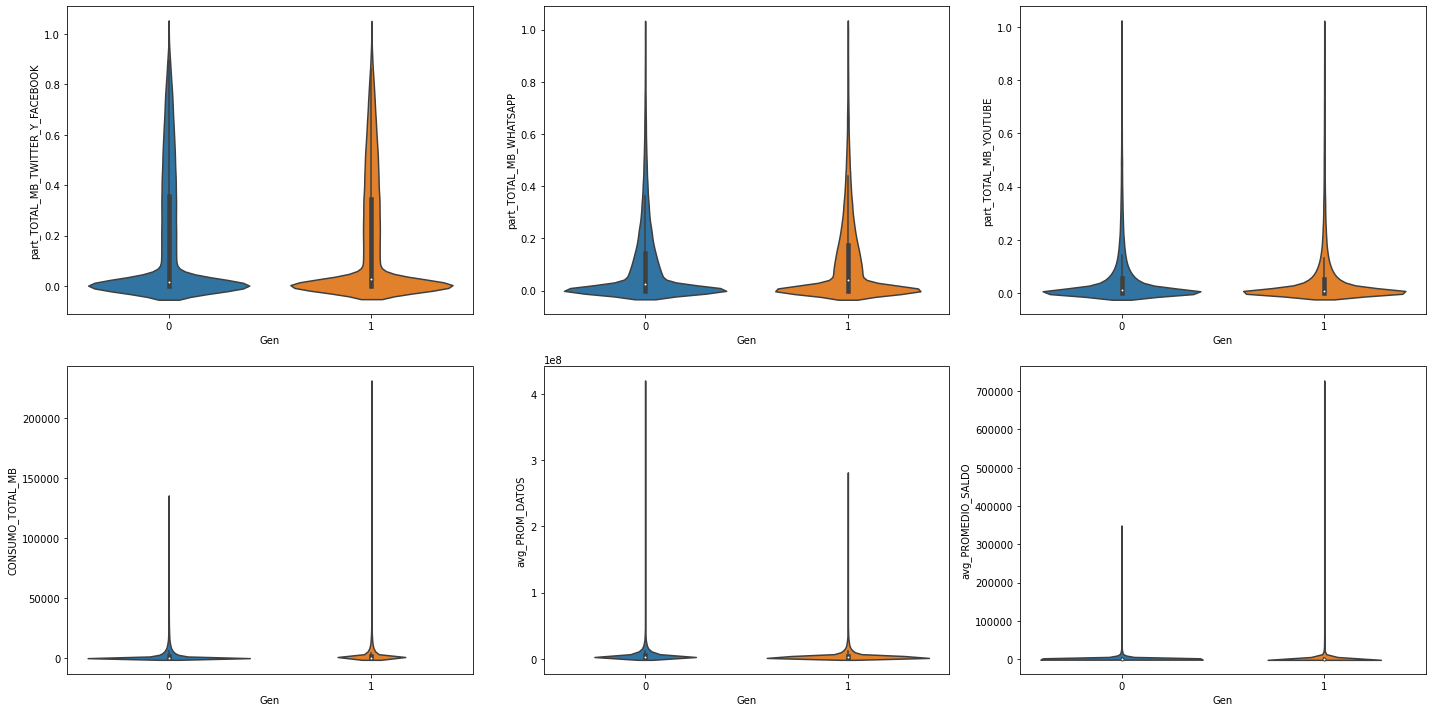

In [300]:
fig, ax = plt.subplots(2, 3, figsize=(20,10))
sns.violinplot(x="Gen", y="part_TOTAL_MB_TWITTER_Y_FACEBOOK", data=dfFinalGen, ax=ax[0,0])
sns.violinplot(x="Gen", y="part_TOTAL_MB_WHATSAPP", data=dfFinalGen, ax=ax[0,1])
sns.violinplot(x="Gen", y="part_TOTAL_MB_YOUTUBE", data=dfFinalGen, ax=ax[0,2])
sns.violinplot(x="Gen", y="CONSUMO_TOTAL_MB", data=dfFinalGen, ax=ax[1,0])
sns.violinplot(x="Gen", y="avg_PROM_DATOS", data=dfFinalGen, ax=ax[1,1,])
sns.violinplot(x="Gen", y="avg_PROMEDIO_SALDO", data=dfFinalGen, ax=ax[1,2])
fig.tight_layout()

## Modelos de género
* No clasifica correctamente con los datos utilizados

In [280]:
Xvar=dfFinalGen.drop(columns = ['EDAD','Gen','catEdad','res_avg_PROM_DATOS','res_avg_PROMEDIO_SALDO'])
yvar=dfFinalGen['Gen']

In [281]:
X_train, X_test, y_train, y_test = train_test_split(Xvar, yvar, test_size = 0.3, random_state = 86, shuffle= True)

In [282]:
y_train.value_counts()

1    50277
0    49269
Name: Gen, dtype: int64

In [283]:
modelClass=LGBMClassifier(n_estimators=1000, learning_rate=0.01, reg_alpha=3, reg_lambda=3, objective ='binary')
modelClass.fit(X_train, y_train, eval_set =[(X_test,y_test)] , eval_metric=['auc'],verbose = 2) # ajustamos los datos de entrenamiento
# early_stopping_rounds=10

[2]	valid_0's auc: 0.567489	valid_0's binary_logloss: 0.69276
[4]	valid_0's auc: 0.567414	valid_0's binary_logloss: 0.692478
[6]	valid_0's auc: 0.567598	valid_0's binary_logloss: 0.692209
[8]	valid_0's auc: 0.56792	valid_0's binary_logloss: 0.691948
[10]	valid_0's auc: 0.56785	valid_0's binary_logloss: 0.691696
[12]	valid_0's auc: 0.567845	valid_0's binary_logloss: 0.691459
[14]	valid_0's auc: 0.5683	valid_0's binary_logloss: 0.691237
[16]	valid_0's auc: 0.568554	valid_0's binary_logloss: 0.691017
[18]	valid_0's auc: 0.568784	valid_0's binary_logloss: 0.690805
[20]	valid_0's auc: 0.569047	valid_0's binary_logloss: 0.690601
[22]	valid_0's auc: 0.569191	valid_0's binary_logloss: 0.690411
[24]	valid_0's auc: 0.569349	valid_0's binary_logloss: 0.690226
[26]	valid_0's auc: 0.569368	valid_0's binary_logloss: 0.690048
[28]	valid_0's auc: 0.56959	valid_0's binary_logloss: 0.689875
[30]	valid_0's auc: 0.569629	valid_0's binary_logloss: 0.689712
[32]	valid_0's auc: 0.569788	valid_0's binary_logl

[278]	valid_0's auc: 0.573212	valid_0's binary_logloss: 0.684438
[280]	valid_0's auc: 0.573184	valid_0's binary_logloss: 0.68444
[282]	valid_0's auc: 0.57318	valid_0's binary_logloss: 0.684439
[284]	valid_0's auc: 0.573199	valid_0's binary_logloss: 0.684433
[286]	valid_0's auc: 0.573198	valid_0's binary_logloss: 0.684431
[288]	valid_0's auc: 0.573208	valid_0's binary_logloss: 0.684431
[290]	valid_0's auc: 0.573231	valid_0's binary_logloss: 0.684421
[292]	valid_0's auc: 0.573237	valid_0's binary_logloss: 0.684417
[294]	valid_0's auc: 0.573274	valid_0's binary_logloss: 0.684406
[296]	valid_0's auc: 0.573317	valid_0's binary_logloss: 0.684401
[298]	valid_0's auc: 0.573336	valid_0's binary_logloss: 0.684395
[300]	valid_0's auc: 0.573336	valid_0's binary_logloss: 0.68439
[302]	valid_0's auc: 0.573382	valid_0's binary_logloss: 0.684381
[304]	valid_0's auc: 0.573391	valid_0's binary_logloss: 0.684376
[306]	valid_0's auc: 0.573391	valid_0's binary_logloss: 0.684371
[308]	valid_0's auc: 0.57341

[536]	valid_0's auc: 0.574045	valid_0's binary_logloss: 0.684142
[538]	valid_0's auc: 0.574052	valid_0's binary_logloss: 0.684143
[540]	valid_0's auc: 0.574057	valid_0's binary_logloss: 0.684143
[542]	valid_0's auc: 0.574064	valid_0's binary_logloss: 0.684141
[544]	valid_0's auc: 0.574052	valid_0's binary_logloss: 0.684144
[546]	valid_0's auc: 0.574065	valid_0's binary_logloss: 0.684146
[548]	valid_0's auc: 0.574041	valid_0's binary_logloss: 0.684148
[550]	valid_0's auc: 0.574044	valid_0's binary_logloss: 0.684149
[552]	valid_0's auc: 0.574032	valid_0's binary_logloss: 0.684148
[554]	valid_0's auc: 0.574034	valid_0's binary_logloss: 0.684148
[556]	valid_0's auc: 0.574035	valid_0's binary_logloss: 0.684146
[558]	valid_0's auc: 0.574042	valid_0's binary_logloss: 0.684147
[560]	valid_0's auc: 0.574044	valid_0's binary_logloss: 0.684145
[562]	valid_0's auc: 0.574032	valid_0's binary_logloss: 0.684148
[564]	valid_0's auc: 0.574027	valid_0's binary_logloss: 0.684148
[566]	valid_0's auc: 0.57

[808]	valid_0's auc: 0.573851	valid_0's binary_logloss: 0.684207
[810]	valid_0's auc: 0.57386	valid_0's binary_logloss: 0.684207
[812]	valid_0's auc: 0.573862	valid_0's binary_logloss: 0.684207
[814]	valid_0's auc: 0.573869	valid_0's binary_logloss: 0.684203
[816]	valid_0's auc: 0.573848	valid_0's binary_logloss: 0.684205
[818]	valid_0's auc: 0.573832	valid_0's binary_logloss: 0.684206
[820]	valid_0's auc: 0.573835	valid_0's binary_logloss: 0.684208
[822]	valid_0's auc: 0.573833	valid_0's binary_logloss: 0.68421
[824]	valid_0's auc: 0.57385	valid_0's binary_logloss: 0.684208
[826]	valid_0's auc: 0.573847	valid_0's binary_logloss: 0.684209
[828]	valid_0's auc: 0.573841	valid_0's binary_logloss: 0.684208
[830]	valid_0's auc: 0.573851	valid_0's binary_logloss: 0.68421
[832]	valid_0's auc: 0.573852	valid_0's binary_logloss: 0.68421
[834]	valid_0's auc: 0.573845	valid_0's binary_logloss: 0.684211
[836]	valid_0's auc: 0.573849	valid_0's binary_logloss: 0.684214
[838]	valid_0's auc: 0.573851	

LGBMClassifier(learning_rate=0.01, n_estimators=1000, objective='binary',
               reg_alpha=3, reg_lambda=3)

In [284]:
predTestClass= modelClass.predict(X_test)

In [285]:
X_test.head(5)

,part_TOTAL_MB_INSTAGRAM,part_TOTAL_MB_TWITTER_Y_FACEBOOK,part_TOTAL_MB_WHATSAPP,part_TOTAL_MB_YOUTUBE,CONSUMO_TOTAL_MB,avg_PROM_DATOS,avg_PROMEDIO_SALDO
8316,0.000,0.073,0.083,0.527,628.000,1383540.638,1.830
187365,0.000,0.000,0.000,0.000,-1.000,6509657.497,0.000
2914,0.000,0.010,0.237,0.341,1348.000,2767611.477,0.100
27626,0.000,0.000,0.000,0.000,-1.000,505445.207,38.880
231020,0.000,0.270,0.176,0.063,904.000,5388667.406,258.065


In [286]:
predTestClass

array([1, 0, 0, ..., 1, 1, 0])

In [287]:
# logistic regresion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [288]:
model_lg = LogisticRegression(C=1, solver="liblinear")
model_lg.fit(X_train, y_train)

LogisticRegression(C=1, solver='liblinear')

In [289]:
predLG = model_lg.predict(X_test)
predLG

array([0, 1, 0, ..., 1, 1, 1])

In [290]:
#y_test

In [291]:
print("F1 score: ", f1_score(y_test, predLG))
print("Accuracy: ", accuracy_score(y_test, predLG) * 100)

F1 score:  0.5490849305585602
Accuracy:  51.14267632374657


### Aplicar el modelo a la base completa

In [350]:
dfBC = pd.read_csv(f'tabla1_TotalV4.csv')

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (1,32,35,95) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [351]:
len(dfBC)

8262131

In [352]:
dfBC.isnull().sum()

CO_ID                                     0
IDENTIFICACION                            0
POROUT                                    0
TOTAL_MB_WHATSAPP                         0
TOTAL_MB_TWITTER_Y_FACEBOOK               0
TOTAL_MB_SNAPCHAT                         0
TOTAL_MB_INSTAGRAM                        0
TOTAL_MB_YOUTUBE                          0
TOTAL_MB_GOOGLE_MAPS                      0
CONSUMO_TOTAL_MB                          0
ANTIGUEDAD_USUARIO                  5044299
TOTAL_VALOR_DE_ADELANTA_SALDO       5688616
ES_SMARTPHONE                       4981607
tipo_id                                   0
ACTIGUEDAD_ACT_BSCS                       0
avg_PROM_SEGUNDOS                   3683735
STD_PROM_SEGUNDOS                   4457634
STD_cat_PROM_SEGUNDOS               4457654
STD_cat2_PROM_SEGUNDOS              4457654
slope_PROM_SEGUNDOS                 4457634
slope_cat_PROM_SEGUNDOS             4457654
slope_cat2_PROM_SEGUNDOS            4457654
avg_PROM_DATOS                  

### Seleccionar con información del consumo

In [353]:
varPq=['paq_youtube', 'paq_ws', 'paq_waze', 'paq_twitter','paq_snapchat',
        'paq_sms','paq_Instagram','paq_minutos','paq_datos']
varCon=['CONSUMO_TOTAL_MB','TOTAL_MB_YOUTUBE','TOTAL_MB_WHATSAPP','TOTAL_MB_TWITTER_Y_FACEBOOK','TOTAL_MB_SNAPCHAT',
        'TOTAL_MB_INSTAGRAM','TOTAL_MB_GOOGLE_MAPS']

In [354]:
dfBC['selConsumo']=dfBC[varCon].max(axis=1)

In [355]:
dfBC['selConsumo2']=np.where(dfBC['selConsumo']<=5,dfBC['selConsumo'],'>10')

In [356]:
dfBC['selConsumo2'].value_counts()

-1.0    5959033
>10     1812771
0.0      369032
1.0       47714
2.0       26398
3.0       19669
4.0       15156
5.0       12358
Name: selConsumo2, dtype: int64

In [357]:
ResumenTotalPO=dfBC[['selConsumo2','POROUT']].groupby('selConsumo2').agg(['sum','count'])

In [358]:
ResumenTotalPO.columns = ResumenTotalPO.columns.droplevel()

In [359]:
ResumenTotalPO

,sum,count
selConsumo2,,
-1.0,61628,5959033
0.0,21315,369032
1.0,3192,47714
2.0,1839,26398
3.0,1531,19669
4.0,1131,15156
5.0,897,12358
>10,213224,1812771


In [360]:
ResumenTotalPO['sum'].sum()

304757

In [361]:
ResumenTotalPO['count'].sum()

8262131

In [362]:
ResumenTotalPO['sum'].sum()/ResumenTotalPO['count'].sum()

0.036886004349241136

In [363]:
ResumenTotalPO['indicePorout']=ResumenTotalPO['sum']/ResumenTotalPO['count']

In [364]:
## seleccionar datos con imformación de consumo

In [365]:
dfBC=dfBC[dfBC['selConsumo']>0]

In [366]:
len(dfBC)

1934066

In [367]:
dfBC['POROUT'].sum()

221814

In [368]:
dfBC['POROUT'].sum()/len(dfBC)

0.11468791654473012

In [369]:
#### Graficar indice de porout

### Calcular la Edad de todas las observaciones con modelo predictivo

In [370]:
#Seleccionar columnas para algoritmo

In [374]:
colX=dfFinal.drop(columns = ['EDAD','Gen','catEdad','res_avg_PROM_DATOS','res_avg_PROMEDIO_SALDO']).columns

In [375]:
colX

Index(['part_TOTAL_MB_INSTAGRAM', 'part_TOTAL_MB_TWITTER_Y_FACEBOOK',
       'part_TOTAL_MB_WHATSAPP', 'part_TOTAL_MB_YOUTUBE', 'CONSUMO_TOTAL_MB',
       'avg_PROM_DATOS', 'avg_PROMEDIO_SALDO'],
      dtype='object')

In [376]:
X_input=dfBC[colX]

In [485]:
edad_pred= modelLgbm.predict(X_input)

In [486]:
dfBC['Edad_pred']=edad_pred

In [487]:
dfBC.sample(10)

,CO_ID,IDENTIFICACION,POROUT,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,tipo_id,ACTIGUEDAD_ACT_BSCS,avg_PROM_SEGUNDOS,STD_PROM_SEGUNDOS,STD_cat_PROM_SEGUNDOS,STD_cat2_PROM_SEGUNDOS,slope_PROM_SEGUNDOS,slope_cat_PROM_SEGUNDOS,slope_cat2_PROM_SEGUNDOS,avg_PROM_DATOS,STD_PROM_DATOS,STD_cat_PROM_DATOS,STD_cat2_PROM_DATOS,slope_PROM_DATOS,slope_cat_PROM_DATOS,slope_cat2_PROM_DATOS,avg_PROMEDIO_SALDO,STD_PROMEDIO_SALDO,STD_cat_PROMEDIO_SALDO,STD_cat2_PROMEDIO_SALDO,slope_PROMEDIO_SALDO,slope_cat_PROMEDIO_SALDO,slope_cat2_PROMEDIO_SALDO,paq_datos,paq_empresas,paq_facebook,paq_todoIncluido,paq_Instagram,paq_LargaDistancia,paq_sms,paq_migracion,paq_minutos,paq_pasatiempo,paq_sinpaquete,paq_snapchat,paq_speedy,paq_suscripcion,paq_twitter,paq_ws,paq_waze,paq_wtf,paq_youtube,nom_paq_x,nom_paq_y,paq_datos_v,paq_datos_q,paq_empresas_v,paq_empresas_q,paq_facebook_v,paq_facebook_q,paq_todoIncluido_v,paq_todoIncluido_q,paq_Instagram_v,paq_Instagram_q,paq_LargaDistancia_v,paq_LargaDistancia_q,paq_sms_v,paq_sms_q,paq_migracion_v,paq_migracion_q,paq_minutos_v,paq_minutos_q,paq_pasatiempo_v,paq_pasatiempo_q,paq_sinpaquete_v,paq_sinpaquete_q,paq_snapchat_v,paq_snapchat_q,paq_speedy_v,paq_speedy_q,paq_suscripcion_v,paq_suscripcion_q,paq_twitter_v,paq_twitter_q,paq_ws_v,paq_ws_q,paq_waze_v,paq_waze_q,paq_wtf_v,paq_wtf_q,paq_youtube_v,paq_youtube_q,res_Region,res_Depto,res_Mun,t_viajero,tipo_ACT,part_TOTAL_MB_WHATSAPP,part_TOTAL_MB_TWITTER_Y_FACEBOOK,part_TOTAL_MB_SNAPCHAT,part_TOTAL_MB_INSTAGRAM,part_TOTAL_MB_YOUTUBE,part_TOTAL_MB_GOOGLE_MAPS,razon_CANCELACION,razon_COBRO,razon_COMERCIAL,razon_EQUIPO,razon_FACTURACION,razon_INFORMACION,razon_PAGO,razon_PQR,razon_SERVICIO,razon_VOZ Y DATOS,VLR_PAQ_MAS_COMPRADO_2MESES,CANT_PAQ_MAS_COMPRADO_2MESES,selConsumo,selConsumo2,Edad_pred
6378140,345600214,901002589.000,0,1157.000,2734.000,2.000,0.000,1774.000,0.000,6271.000,55.000,0.000,1.000,NIT,101,146.628,148.123,1.010,dispersed,209.478,1.429,increase,16675641.920,2176886.177,0.131,united,3078581.956,0.185,increase,0.000,0.000,NaN,NaN,0.000,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,sinPaquete,sinPaquete,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Costa,Magdalena,Sabanas De San angel,sinCambio,seMantiene,0.185,0.436,0.000,0.000,0.283,0.000,0,0,0,0,0,0,0,0,0,0,0.000,0.000,6271.000,>10,40.655
6892522,348252836,9000174478.000,0,35.000,160.000,2.000,13.000,7.000,0.000,814.000,3.000,0.000,1.000,NIT,64,68.000,NaN,NaN,NaN,NaN,NaN,NaN,8537813.910,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,sinPaquete,sinPaquete,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,sinCambio,seMantiene,0.043,0.197,0.002,0.016,0.009,0.000,0,0,0,0,0,0,0,0,0,0,0.000,0.000,814.000,>10,36.112
7722304,310356956,900206408,0,369.000,6.000,0.000,30.000,2.000,0.000,618.000,361.000,0.000,1.000,NIT,499,77.476,41.011,0.529,dispersed,16.345,0.211,increase,673141.685,934447.762,1.388,dispersed,526582.777,0.782,increase,0.000,0.000,NaN,NaN,0.000,NaN,NaN,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,Datos 2GB+WTF Vig 7 dias,sinPaquete,-7000.000,1.000,-0.000,0.000,-7000.000,1.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-7000.000,1.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-7000.000,1.000,-7000.000,1.000,-0.000,0.000,-7000.000,1.000,-0.000,0.000,NaN,NaN,NaN,sinCambio,seMantiene,0.597,0.010,0.000,0.049,0.003,0.000,0,0,0,0,0,0,0,0,0,0,-7000.000,1.000,618.000,>10,40.535
2433234,307593807,807009

### Agregar Edades previamente identificadas
* Edades utilizadas para entrenar el modelo y se usaron de base.

In [492]:
df1[['CO_ID','EDAD']].head()

,CO_ID,EDAD
0,7045723,43.432
1,7153200,54.792
2,7166147,61.881
3,7236526,42.822
4,7360814,49.735


In [489]:
df1['selContID'].value_counts()

val    233926
Name: selContID, dtype: int64

In [500]:
df1[df1['EDAD'].isnull()]

,Unnamed: 0,CO_ID,IDENTIFICACION,POROUT,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,ACTIGUEDAD_ACT_BSCS,avg_PROM_SEGUNDOS,STD_PROM_SEGUNDOS,STD_cat_PROM_SEGUNDOS,STD_cat2_PROM_SEGUNDOS,slope_PROM_SEGUNDOS,slope_cat_PROM_SEGUNDOS,slope_cat2_PROM_SEGUNDOS,avg_PROM_DATOS,STD_PROM_DATOS,STD_cat_PROM_DATOS,STD_cat2_PROM_DATOS,slope_PROM_DATOS,slope_cat_PROM_DATOS,slope_cat2_PROM_DATOS,avg_PROMEDIO_SALDO,STD_PROMEDIO_SALDO,STD_cat_PROMEDIO_SALDO,STD_cat2_PROMEDIO_SALDO,slope_PROMEDIO_SALDO,slope_cat_PROMEDIO_SALDO,slope_cat2_PROMEDIO_SALDO,paq_datos,paq_empresas,paq_facebook,paq_Instagram,paq_LargaDistancia,paq_migracion,paq_minutos,paq_pasatiempo,paq_sinpaquete,paq_sms,paq_snapchat,paq_speedy,paq_suscripcion,paq_todoIncluido,paq_twitter,paq_waze,paq_ws,paq_wtf,paq_youtube,paq_datos_v,paq_datos_q,paq_empresas_v,paq_empresas_q,paq_facebook_v,paq_facebook_q,paq_Instagram_v,paq_Instagram_q,paq_LargaDistancia_v,paq_LargaDistancia_q,paq_migracion_v,paq_migracion_q,paq_minutos_v,paq_minutos_q,paq_pasatiempo_v,paq_pasatiempo_q,paq_sinpaquete_v,paq_sinpaquete_q,paq_sms_v,paq_sms_q,paq_snapchat_v,paq_snapchat_q,paq_speedy_v,paq_speedy_q,paq_suscripcion_v,paq_suscripcion_q,paq_todoIncluido_v,paq_todoIncluido_q,paq_twitter_v,paq_twitter_q,paq_waze_v,paq_waze_q,paq_ws_v,paq_ws_q,paq_wtf_v,paq_wtf_q,paq_youtube_v,paq_youtube_q,t_viajero,tipo_ACT,part_TOTAL_MB_WHATSAPP,part_TOTAL_MB_TWITTER_Y_FACEBOOK,part_TOTAL_MB_SNAPCHAT,part_TOTAL_MB_INSTAGRAM,part_TOTAL_MB_YOUTUBE,part_TOTAL_MB_GOOGLE_MAPS,res_Region,res_Depto,res_Mun,razon_CANCELACION,razon_COBRO,razon_COMERCIAL,razon_EQUIPO,razon_FACTURACION,razon_INFORMACION,razon_PAGO,razon_PQR,razon_SERVICIO,razon_VOZ Y DATOS,EDAD,Gen,selContID
300361,300361,258121849,VALBUENA,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1110.000,NaN,1.000,0.000,0.000,1163,176.510,101.279,0.574,dispersed,-27.092,-0.153,decrease,1500510.817,2961225.852,1.973,dispersed,-1788571.785,-1.192,decrease,1.200,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,sinCambio,seMantiene,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN,val
311585,311585,261035085,BUITRAGO,1,810.000,1401.000,36.000,33.000,92.000,0.000,4620.000,0.000,0.000,1080.000,0.000,1.000,0.000,0.000,1118,307.029,118.761,0.387,moderate,-40.362,-0.131,decrease,5871164.422,1279883.608,0.218,united,-147473.445,-0.025,noTrend,24.511,40.735,1.662,dispersed,1.000,0.041,noTrend,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,sinCambio,seMantiene,0.175,0.303,0.008,0.007,0.020,0.000,NorOccidente,Caldas,Manizales,0,0,0,0,0,0,0,0,0,0,NaN,NaN,val


In [501]:
dfBCV2=dfBC.merge(df1[df1['EDAD'].notnull()][['CO_ID','EDAD']],left_on='CO_ID' , right_on='CO_ID')

In [502]:
dfBCV2.sample(5)

,CO_ID,IDENTIFICACION,POROUT,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,tipo_id,ACTIGUEDAD_ACT_BSCS,avg_PROM_SEGUNDOS,STD_PROM_SEGUNDOS,STD_cat_PROM_SEGUNDOS,STD_cat2_PROM_SEGUNDOS,slope_PROM_SEGUNDOS,slope_cat_PROM_SEGUNDOS,slope_cat2_PROM_SEGUNDOS,avg_PROM_DATOS,STD_PROM_DATOS,STD_cat_PROM_DATOS,STD_cat2_PROM_DATOS,slope_PROM_DATOS,slope_cat_PROM_DATOS,slope_cat2_PROM_DATOS,avg_PROMEDIO_SALDO,STD_PROMEDIO_SALDO,STD_cat_PROMEDIO_SALDO,STD_cat2_PROMEDIO_SALDO,slope_PROMEDIO_SALDO,slope_cat_PROMEDIO_SALDO,slope_cat2_PROMEDIO_SALDO,paq_datos,paq_empresas,paq_facebook,paq_todoIncluido,paq_Instagram,paq_LargaDistancia,paq_sms,paq_migracion,paq_minutos,paq_pasatiempo,paq_sinpaquete,paq_snapchat,paq_speedy,paq_suscripcion,paq_twitter,paq_ws,paq_waze,paq_wtf,paq_youtube,nom_paq_x,nom_paq_y,paq_datos_v,paq_datos_q,paq_empresas_v,paq_empresas_q,paq_facebook_v,paq_facebook_q,paq_todoIncluido_v,paq_todoIncluido_q,paq_Instagram_v,paq_Instagram_q,paq_LargaDistancia_v,paq_LargaDistancia_q,paq_sms_v,paq_sms_q,paq_migracion_v,paq_migracion_q,paq_minutos_v,paq_minutos_q,paq_pasatiempo_v,paq_pasatiempo_q,paq_sinpaquete_v,paq_sinpaquete_q,paq_snapchat_v,paq_snapchat_q,paq_speedy_v,paq_speedy_q,paq_suscripcion_v,paq_suscripcion_q,paq_twitter_v,paq_twitter_q,paq_ws_v,paq_ws_q,paq_waze_v,paq_waze_q,paq_wtf_v,paq_wtf_q,paq_youtube_v,paq_youtube_q,res_Region,res_Depto,res_Mun,t_viajero,tipo_ACT,part_TOTAL_MB_WHATSAPP,part_TOTAL_MB_TWITTER_Y_FACEBOOK,part_TOTAL_MB_SNAPCHAT,part_TOTAL_MB_INSTAGRAM,part_TOTAL_MB_YOUTUBE,part_TOTAL_MB_GOOGLE_MAPS,razon_CANCELACION,razon_COBRO,razon_COMERCIAL,razon_EQUIPO,razon_FACTURACION,razon_INFORMACION,razon_PAGO,razon_PQR,razon_SERVICIO,razon_VOZ Y DATOS,VLR_PAQ_MAS_COMPRADO_2MESES,CANT_PAQ_MAS_COMPRADO_2MESES,selConsumo,selConsumo2,Edad_pred,EDAD
31077,263240782,20504309.000,1,2.000,1.000,0.000,0.000,7.000,0.000,24.000,1059.000,0.000,1.000,cedula,1090,337.958,47.072,0.139,united,-23.783,-0.070,noTrend,34652.908,35151.024,1.014,moderate,16568.079,0.478,increase,2550.189,1751.144,0.687,moderate,1742.183,0.683,increase,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,sinPaquete,sinPaquete,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,sinCambio,seMantiene,0.083,0.042,0.000,0.000,0.292,0.000,0,0,0,0,0,0,0,0,0,0,0.000,0.000,24.000,>10,51.263,70.807
68742,328151829,18143922.000,1,105.000,107.000,8.000,0.000,163.000,0.000,1681.000,NaN,0.000,1.000,cedula,283,299.859,94.333,0.315,moderate,63.331,0.211,increase,1207467.495,1131354.969,0.937,moderate,282927.114,0.234,increase,0.000,0.000,NaN,NaN,0.000,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,sinPaquete,sinPaquete,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Oriente,Meta,Villavicencio,sinCambio,seMantiene,0.062,0.064,0.005,0.000,0.097,0.000,0,0,0,0,0,0,0,0,0,0,0.000,0.000,1681.000,>10,46.157,51.847
100836,98434381,89008709.0,0,298.000,1185.000,7.000,0.000,68.000,0.000,1770.000,3635.000,0.000,1.000,cedula,3697,295.003,13.138,0.045,united,-2.778,-0.009,noTrend,4254064.108,1179575.472,0.277,united,191014.073,0.045,noTrend,1.059,0.123,0.116,united,-0.106,-0.100,decrease,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,Paquetes Minutos migracion,sinPaquete,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-2000.000,1.000,-2000.000,1.000,-0.000,0.000,-2000.000,1.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,NorOccidente,Risaralda,Pereira,sinCambio,seMantiene,0.168,0.669,0.00

In [503]:
len(dfBCV2)

154777

In [505]:
#dfBCV2.isnull().sum()

In [506]:
RMSE=mean_squared_error(dfBCV2['EDAD'],dfBCV2['Edad_pred'], squared=False)
MAPE=mean_absolute_percentage_error(dfBCV2['EDAD'],dfBCV2['Edad_pred'])
print("RMSE",RMSE,"MAPE",MAPE)

RMSE 13.151541088235536 MAPE 0.30384299824006117


In [507]:
dfBCV3=dfBC.merge(df1[df1['EDAD'].notnull()][['CO_ID','EDAD']],left_on='CO_ID' , right_on='CO_ID',how='left')

In [508]:
len(dfBCV3)

1934066

In [509]:
dfBCV3.head()

,CO_ID,IDENTIFICACION,POROUT,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,tipo_id,ACTIGUEDAD_ACT_BSCS,avg_PROM_SEGUNDOS,STD_PROM_SEGUNDOS,STD_cat_PROM_SEGUNDOS,STD_cat2_PROM_SEGUNDOS,slope_PROM_SEGUNDOS,slope_cat_PROM_SEGUNDOS,slope_cat2_PROM_SEGUNDOS,avg_PROM_DATOS,STD_PROM_DATOS,STD_cat_PROM_DATOS,STD_cat2_PROM_DATOS,slope_PROM_DATOS,slope_cat_PROM_DATOS,slope_cat2_PROM_DATOS,avg_PROMEDIO_SALDO,STD_PROMEDIO_SALDO,STD_cat_PROMEDIO_SALDO,STD_cat2_PROMEDIO_SALDO,slope_PROMEDIO_SALDO,slope_cat_PROMEDIO_SALDO,slope_cat2_PROMEDIO_SALDO,paq_datos,paq_empresas,paq_facebook,paq_todoIncluido,paq_Instagram,paq_LargaDistancia,paq_sms,paq_migracion,paq_minutos,paq_pasatiempo,paq_sinpaquete,paq_snapchat,paq_speedy,paq_suscripcion,paq_twitter,paq_ws,paq_waze,paq_wtf,paq_youtube,nom_paq_x,nom_paq_y,paq_datos_v,paq_datos_q,paq_empresas_v,paq_empresas_q,paq_facebook_v,paq_facebook_q,paq_todoIncluido_v,paq_todoIncluido_q,paq_Instagram_v,paq_Instagram_q,paq_LargaDistancia_v,paq_LargaDistancia_q,paq_sms_v,paq_sms_q,paq_migracion_v,paq_migracion_q,paq_minutos_v,paq_minutos_q,paq_pasatiempo_v,paq_pasatiempo_q,paq_sinpaquete_v,paq_sinpaquete_q,paq_snapchat_v,paq_snapchat_q,paq_speedy_v,paq_speedy_q,paq_suscripcion_v,paq_suscripcion_q,paq_twitter_v,paq_twitter_q,paq_ws_v,paq_ws_q,paq_waze_v,paq_waze_q,paq_wtf_v,paq_wtf_q,paq_youtube_v,paq_youtube_q,res_Region,res_Depto,res_Mun,t_viajero,tipo_ACT,part_TOTAL_MB_WHATSAPP,part_TOTAL_MB_TWITTER_Y_FACEBOOK,part_TOTAL_MB_SNAPCHAT,part_TOTAL_MB_INSTAGRAM,part_TOTAL_MB_YOUTUBE,part_TOTAL_MB_GOOGLE_MAPS,razon_CANCELACION,razon_COBRO,razon_COMERCIAL,razon_EQUIPO,razon_FACTURACION,razon_INFORMACION,razon_PAGO,razon_PQR,razon_SERVICIO,razon_VOZ Y DATOS,VLR_PAQ_MAS_COMPRADO_2MESES,CANT_PAQ_MAS_COMPRADO_2MESES,selConsumo,selConsumo2,Edad_pred,EDAD
0,6891437,1.000,0,0.000,0.000,0.000,0.000,0.000,0.000,4.000,NaN,NaN,1.000,sin id,6617,610.427,309.423,0.507,dispersed,-130.925,-0.214,decrease,35690.556,4792.037,0.134,united,4678.754,0.131,increase,0.000,0.000,NaN,NaN,0.000,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,sinPaquete,sinPaquete,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,SurOccidente,Cauca,Popayan,sinCambio,seMantiene,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,1,0,0.000,0.000,4.000,4.0,42.932,NaN
1,7236526,52427533.000,1,1.000,0.000,0.000,0.000,0.000,0.000,3.000,6524.000,0.000,1.000,cedula,6585,411.850,195.618,0.475,moderate,-120.375,-0.292,decrease,381114.714,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,sinPaquete,sinPaquete,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,sinInfo,seMantiene,0.333,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0.000,0.000,3.000,3.0,42.041,42.822
2,7360991,63449651.000,1,17.000,0.000,0.000,0.000,0.000,0.000,22.000,6576.000,0.000,1.000,cedula,6576,1427.303,301.336,0.211,united,-27.008,-0.019,noTrend,276137.588,242368.665,0.878,moderate,-71207.533,-0.258,decrease,2835.703,3370.562,1.189,dispersed,-3112.855,-1.098,decrease,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,sinPaquete,sinPaquete,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Oriente,Santander,Floridablanca,interMun,seMantiene,0.773,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0.000,0.000,22.000,>10,46.161,43.792
3,7407412,31867209.000,1,469.000,726.000,1.000,0.00

In [510]:
dfBCV3['EDAD']=np.where(dfBCV3['EDAD'].isnull(),dfBCV3['Edad_pred'],dfBCV3['EDAD'])

In [511]:
dfBCV3.to_csv('BaseArboles_conEdad.csv')

### Recortes

In [311]:
del dfcp5
del dfcp4
gc.collect()

NameError: name 'dfcp5' is not defined

In [301]:
dfcp5 = pd.read_csv(f'tabla1_cp5.csv')
dfcp4 = pd.read_csv(f'tabla1_cp5.csv')

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [305]:
print(len(dfcp5),len(dfcp4))

848321 848321


In [307]:
print(len(dfcp5.columns),len(dfcp4.columns))

121 121


In [308]:
dfcp5.head()

,Unnamed: 0,CO_ID,IDENTIFICACION,POROUT,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,ACTIGUEDAD_ACT_BSCS,avg_PROM_SEGUNDOS,STD_PROM_SEGUNDOS,STD_cat_PROM_SEGUNDOS,STD_cat2_PROM_SEGUNDOS,slope_PROM_SEGUNDOS,slope_cat_PROM_SEGUNDOS,slope_cat2_PROM_SEGUNDOS,avg_PROM_DATOS,STD_PROM_DATOS,STD_cat_PROM_DATOS,STD_cat2_PROM_DATOS,slope_PROM_DATOS,slope_cat_PROM_DATOS,slope_cat2_PROM_DATOS,avg_PROMEDIO_SALDO,STD_PROMEDIO_SALDO,STD_cat_PROMEDIO_SALDO,STD_cat2_PROMEDIO_SALDO,slope_PROMEDIO_SALDO,slope_cat_PROMEDIO_SALDO,slope_cat2_PROMEDIO_SALDO,paq_datos,paq_empresas,paq_facebook,paq_Instagram,paq_LargaDistancia,paq_migracion,paq_minutos,paq_pasatiempo,paq_sinpaquete,paq_sms,paq_snapchat,paq_speedy,paq_suscripcion,paq_todoIncluido,paq_twitter,paq_waze,paq_ws,paq_wtf,paq_youtube,paq_datos_v,paq_datos_q,paq_empresas_v,paq_empresas_q,paq_facebook_v,paq_facebook_q,paq_Instagram_v,paq_Instagram_q,paq_LargaDistancia_v,paq_LargaDistancia_q,paq_migracion_v,paq_migracion_q,paq_minutos_v,paq_minutos_q,paq_pasatiempo_v,paq_pasatiempo_q,paq_sinpaquete_v,paq_sinpaquete_q,paq_sms_v,paq_sms_q,paq_snapchat_v,paq_snapchat_q,paq_speedy_v,paq_speedy_q,paq_suscripcion_v,paq_suscripcion_q,paq_todoIncluido_v,paq_todoIncluido_q,paq_twitter_v,paq_twitter_q,paq_waze_v,paq_waze_q,paq_ws_v,paq_ws_q,paq_wtf_v,paq_wtf_q,paq_youtube_v,paq_youtube_q,t_viajero,tipo_ACT,part_TOTAL_MB_WHATSAPP,part_TOTAL_MB_TWITTER_Y_FACEBOOK,part_TOTAL_MB_SNAPCHAT,part_TOTAL_MB_INSTAGRAM,part_TOTAL_MB_YOUTUBE,part_TOTAL_MB_GOOGLE_MAPS,res_Region,res_Depto,res_Mun,razon_CANCELACION,razon_COBRO,razon_COMERCIAL,razon_EQUIPO,razon_FACTURACION,razon_INFORMACION,razon_PAGO,razon_PQR,razon_SERVICIO,razon_VOZ Y DATOS,EDAD,Gen,selContID
0,0,7045723,41939455.000,0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,NaN,NaN,NaN,0.000,0.000,6605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,sinInfo,seMantiene,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,43.432,M,val
1,1,7153200,51832393.000,1,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,NaN,NaN,NaN,0.000,0.000,6591,231.667,NaN,NaN,NaN,NaN,NaN,NaN,1205011.764,2389390.761,1.983,dispersed,-1428486.633,-1.185,decrease,2258.065,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,sinInfo,seMantiene,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,54.792,M,val
2,2,7166147,19383515.000,1,271.000,69.000,0.000,149.000,42.000,0.000,850.000,3.000,-6000.000,6560.000,0.000,1.000,2.000,-3000.000,6591,403.874,168.898,0.418,dispersed,109.164,0.270,increase,802897.989,1395627.707,1.738,dispersed,830992.691,1.035,increase,4925.580,4894.472,0.994,moderate,-4631.367,-0.940,decrease,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,-9000.000,5.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-0.000,0.000,sinCambio,seMantiene,0.319,0.081,0.000,0.175,0.049,0.000,Centro,Cundinamarca,Bogota D C,0,0,0,0,0,0,0,0,0,0,61.881,H,val
3,3,7236526,52427533.000,1,1.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,6524.000,0.000,1.000,0.000

In [309]:
dfcp4.head()

,Unnamed: 0,CO_ID,IDENTIFICACION,POROUT,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,ACTIGUEDAD_ACT_BSCS,avg_PROM_SEGUNDOS,STD_PROM_SEGUNDOS,STD_cat_PROM_SEGUNDOS,STD_cat2_PROM_SEGUNDOS,slope_PROM_SEGUNDOS,slope_cat_PROM_SEGUNDOS,slope_cat2_PROM_SEGUNDOS,avg_PROM_DATOS,STD_PROM_DATOS,STD_cat_PROM_DATOS,STD_cat2_PROM_DATOS,slope_PROM_DATOS,slope_cat_PROM_DATOS,slope_cat2_PROM_DATOS,avg_PROMEDIO_SALDO,STD_PROMEDIO_SALDO,STD_cat_PROMEDIO_SALDO,STD_cat2_PROMEDIO_SALDO,slope_PROMEDIO_SALDO,slope_cat_PROMEDIO_SALDO,slope_cat2_PROMEDIO_SALDO,paq_datos,paq_empresas,paq_facebook,paq_Instagram,paq_LargaDistancia,paq_migracion,paq_minutos,paq_pasatiempo,paq_sinpaquete,paq_sms,paq_snapchat,paq_speedy,paq_suscripcion,paq_todoIncluido,paq_twitter,paq_waze,paq_ws,paq_wtf,paq_youtube,paq_datos_v,paq_datos_q,paq_empresas_v,paq_empresas_q,paq_facebook_v,paq_facebook_q,paq_Instagram_v,paq_Instagram_q,paq_LargaDistancia_v,paq_LargaDistancia_q,paq_migracion_v,paq_migracion_q,paq_minutos_v,paq_minutos_q,paq_pasatiempo_v,paq_pasatiempo_q,paq_sinpaquete_v,paq_sinpaquete_q,paq_sms_v,paq_sms_q,paq_snapchat_v,paq_snapchat_q,paq_speedy_v,paq_speedy_q,paq_suscripcion_v,paq_suscripcion_q,paq_todoIncluido_v,paq_todoIncluido_q,paq_twitter_v,paq_twitter_q,paq_waze_v,paq_waze_q,paq_ws_v,paq_ws_q,paq_wtf_v,paq_wtf_q,paq_youtube_v,paq_youtube_q,t_viajero,tipo_ACT,part_TOTAL_MB_WHATSAPP,part_TOTAL_MB_TWITTER_Y_FACEBOOK,part_TOTAL_MB_SNAPCHAT,part_TOTAL_MB_INSTAGRAM,part_TOTAL_MB_YOUTUBE,part_TOTAL_MB_GOOGLE_MAPS,res_Region,res_Depto,res_Mun,razon_CANCELACION,razon_COBRO,razon_COMERCIAL,razon_EQUIPO,razon_FACTURACION,razon_INFORMACION,razon_PAGO,razon_PQR,razon_SERVICIO,razon_VOZ Y DATOS,EDAD,Gen,selContID
0,0,7045723,41939455.000,0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,NaN,NaN,NaN,0.000,0.000,6605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,sinInfo,seMantiene,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,43.432,M,val
1,1,7153200,51832393.000,1,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,NaN,NaN,NaN,0.000,0.000,6591,231.667,NaN,NaN,NaN,NaN,NaN,NaN,1205011.764,2389390.761,1.983,dispersed,-1428486.633,-1.185,decrease,2258.065,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,sinInfo,seMantiene,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,54.792,M,val
2,2,7166147,19383515.000,1,271.000,69.000,0.000,149.000,42.000,0.000,850.000,3.000,-6000.000,6560.000,0.000,1.000,2.000,-3000.000,6591,403.874,168.898,0.418,dispersed,109.164,0.270,increase,802897.989,1395627.707,1.738,dispersed,830992.691,1.035,increase,4925.580,4894.472,0.994,moderate,-4631.367,-0.940,decrease,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,-9000.000,5.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-0.000,0.000,sinCambio,seMantiene,0.319,0.081,0.000,0.175,0.049,0.000,Centro,Cundinamarca,Bogota D C,0,0,0,0,0,0,0,0,0,0,61.881,H,val
3,3,7236526,52427533.000,1,1.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,6524.000,0.000,1.000,0.000

### Trabajo con variables categoricas

In [14]:
varNumericas=['TOTAL_MB_WHATSAPP', 'TOTAL_MB_TWITTER_Y_FACEBOOK','TOTAL_MB_SNAPCHAT', 'TOTAL_MB_INSTAGRAM', 'TOTAL_MB_YOUTUBE',
       'TOTAL_MB_GOOGLE_MAPS', 'CONSUMO_TOTAL_MB','ANTIGUEDAD_USUARIO', 'TOTAL_VALOR_DE_ADELANTA_SALDO',
         'paq_datos_v', 'paq_datos_q', 'paq_empresas_v', 'paq_empresas_q',
       'paq_facebook_v', 'paq_facebook_q', 'paq_Instagram_v',
       'paq_Instagram_q', 'paq_LargaDistancia_v', 'paq_LargaDistancia_q',
       'paq_migracion_v', 'paq_migracion_q', 'paq_minutos_v',
       'paq_minutos_q', 'paq_pasatiempo_v', 'paq_pasatiempo_q',
       'paq_sinpaquete_v', 'paq_sinpaquete_q', 'paq_sms_v', 'paq_sms_q',
       'paq_snapchat_v', 'paq_snapchat_q', 'paq_speedy_v', 'paq_speedy_q',
       'paq_suscripcion_v', 'paq_suscripcion_q', 'paq_todoIncluido_v',
       'paq_todoIncluido_q', 'paq_twitter_v', 'paq_twitter_q',
       'paq_waze_v', 'paq_waze_q', 'paq_ws_v', 'paq_ws_q', 'paq_wtf_v',
       'paq_wtf_q', 'paq_youtube_v', 'paq_youtube_q','avg_PROM_SEGUNDOS','avg_PROM_DATOS','avg_PROMEDIO_SALDO',
        'part_TOTAL_MB_WHATSAPP',
       'part_TOTAL_MB_TWITTER_Y_FACEBOOK', 'part_TOTAL_MB_SNAPCHAT',
       'part_TOTAL_MB_INSTAGRAM', 'part_TOTAL_MB_YOUTUBE',
       'part_TOTAL_MB_GOOGLE_MAPS','EDAD']
varCategoricasOrdinales=['POROUT','ES_SMARTPHONE','razon_CANCELACION','razon_COBRO', 'razon_COMERCIAL',
       'razon_EQUIPO', 'razon_FACTURACION', 'razon_INFORMACION',
       'razon_PAGO']
varCategoricasNominales=['res_Region','Gen']

In [15]:
df['res_Region'].value_counts()

Centro          37705
NorOccidente    30209
Oriente         26732
Costa           24224
SurOccidente    23664
Name: res_Region, dtype: int64

In [16]:
df['Gen'].value_counts()

a    91715
M    71915
H    70294
Name: Gen, dtype: int64

In [17]:
#one_hot_data = pd.get_dummies(df[['res_Region','Gen']],drop_first=True)
one_hot_data = pd.get_dummies(df[['res_Region','Gen']])

In [18]:
one_hot_data.head(2)

,res_Region_Centro,res_Region_Costa,res_Region_NorOccidente,res_Region_Oriente,res_Region_SurOccidente,Gen_H,Gen_M,Gen_a
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0


In [19]:
#tablaAnalisis['COMPORTAMIENTO_PAGO'].cat.reorder_categories([0,'ALTO RIESGO','REGULAR','BUENO','MUY BUENO'], inplace=True)

In [20]:
dfFinal=df.merge(one_hot_data, left_index=True, right_index=True)

In [21]:
dfFinal.head()

,POROUT,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,CANT_PAQ_MAS_COMPRADO_MES,VLR_PAQ_MAS_COMPRADO_MES,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,ES_SMARTPHONE,CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR,VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR,ACTIGUEDAD_ACT_BSCS,avg_PROM_SEGUNDOS,STD_PROM_SEGUNDOS,STD_cat_PROM_SEGUNDOS,STD_cat2_PROM_SEGUNDOS,slope_PROM_SEGUNDOS,slope_cat_PROM_SEGUNDOS,slope_cat2_PROM_SEGUNDOS,avg_PROM_DATOS,STD_PROM_DATOS,STD_cat_PROM_DATOS,STD_cat2_PROM_DATOS,slope_PROM_DATOS,slope_cat_PROM_DATOS,slope_cat2_PROM_DATOS,avg_PROMEDIO_SALDO,STD_PROMEDIO_SALDO,STD_cat_PROMEDIO_SALDO,STD_cat2_PROMEDIO_SALDO,slope_PROMEDIO_SALDO,slope_cat_PROMEDIO_SALDO,slope_cat2_PROMEDIO_SALDO,paq_datos,paq_empresas,paq_facebook,paq_Instagram,paq_LargaDistancia,paq_migracion,paq_minutos,paq_pasatiempo,paq_sinpaquete,paq_sms,paq_snapchat,paq_speedy,paq_suscripcion,paq_todoIncluido,paq_twitter,paq_waze,paq_ws,paq_wtf,paq_youtube,paq_datos_v,paq_datos_q,paq_empresas_v,paq_empresas_q,paq_facebook_v,paq_facebook_q,paq_Instagram_v,paq_Instagram_q,paq_LargaDistancia_v,paq_LargaDistancia_q,paq_migracion_v,paq_migracion_q,paq_minutos_v,paq_minutos_q,paq_pasatiempo_v,paq_pasatiempo_q,paq_sinpaquete_v,paq_sinpaquete_q,paq_sms_v,paq_sms_q,paq_snapchat_v,paq_snapchat_q,paq_speedy_v,paq_speedy_q,paq_suscripcion_v,paq_suscripcion_q,paq_todoIncluido_v,paq_todoIncluido_q,paq_twitter_v,paq_twitter_q,paq_waze_v,paq_waze_q,paq_ws_v,paq_ws_q,paq_wtf_v,paq_wtf_q,paq_youtube_v,paq_youtube_q,t_viajero,tipo_ACT,part_TOTAL_MB_WHATSAPP,part_TOTAL_MB_TWITTER_Y_FACEBOOK,part_TOTAL_MB_SNAPCHAT,part_TOTAL_MB_INSTAGRAM,part_TOTAL_MB_YOUTUBE,part_TOTAL_MB_GOOGLE_MAPS,res_Region,res_Depto,res_Mun,razon_CANCELACION,razon_COBRO,razon_COMERCIAL,razon_EQUIPO,razon_FACTURACION,razon_INFORMACION,razon_PAGO,razon_PQR,razon_SERVICIO,razon_VOZ Y DATOS,EDAD,Gen,res_Region_Centro,res_Region_Costa,res_Region_NorOccidente,res_Region_Oriente,res_Region_SurOccidente,Gen_H,Gen_M,Gen_a
0,0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,NaN,NaN,NaN,0.000,0.000,6605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,sinInfo,seMantiene,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,43.432,M,0,0,0,0,0,0,1,0
1,1,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,NaN,NaN,NaN,0.000,0.000,6591,231.667,NaN,NaN,NaN,NaN,NaN,NaN,1205011.764,2389390.761,1.983,dispersed,-1428486.633,-1.185,decrease,2258.065,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,sinInfo,seMantiene,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,54.792,M,0,0,0,0,0,0,1,0
2,1,271.000,69.000,0.000,149.000,42.000,0.000,850.000,3.000,-6000.000,6560.000,0.000,1.000,2.000,-3000.000,6591,403.874,168.898,0.418,dispersed,109.164,0.270,increase,802897.989,1395627.707,1.738,dispersed,830992.691,1.035,increase,4925.580,4894.472,0.994,moderate,-4631.367,-0.940,decrease,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,-9000.000,5.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-0.000,0.000,sinCambio,seMantiene,0.319,0.081,0.000,0.175,0.049,0.000,Centro,Cundinamarca,Bogota D C,0,0,0,0,0,0,0,0,0,0,61.881,H,1,0,0,0,0,1,0,0
3,1,1.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,6524

In [22]:
len(dfFinal)

233926

In [23]:
dfFinal.drop(columns=['res_Region','Gen'],inplace=True)

In [24]:
dfFinal.reset_index(drop=True,inplace=True)

In [25]:
varNumericas+varCategoricasOrdinales+list(one_hot_data.columns)

['TOTAL_MB_WHATSAPP',
 'TOTAL_MB_TWITTER_Y_FACEBOOK',
 'TOTAL_MB_SNAPCHAT',
 'TOTAL_MB_INSTAGRAM',
 'TOTAL_MB_YOUTUBE',
 'TOTAL_MB_GOOGLE_MAPS',
 'CONSUMO_TOTAL_MB',
 'ANTIGUEDAD_USUARIO',
 'TOTAL_VALOR_DE_ADELANTA_SALDO',
 'paq_datos_v',
 'paq_datos_q',
 'paq_empresas_v',
 'paq_empresas_q',
 'paq_facebook_v',
 'paq_facebook_q',
 'paq_Instagram_v',
 'paq_Instagram_q',
 'paq_LargaDistancia_v',
 'paq_LargaDistancia_q',
 'paq_migracion_v',
 'paq_migracion_q',
 'paq_minutos_v',
 'paq_minutos_q',
 'paq_pasatiempo_v',
 'paq_pasatiempo_q',
 'paq_sinpaquete_v',
 'paq_sinpaquete_q',
 'paq_sms_v',
 'paq_sms_q',
 'paq_snapchat_v',
 'paq_snapchat_q',
 'paq_speedy_v',
 'paq_speedy_q',
 'paq_suscripcion_v',
 'paq_suscripcion_q',
 'paq_todoIncluido_v',
 'paq_todoIncluido_q',
 'paq_twitter_v',
 'paq_twitter_q',
 'paq_waze_v',
 'paq_waze_q',
 'paq_ws_v',
 'paq_ws_q',
 'paq_wtf_v',
 'paq_wtf_q',
 'paq_youtube_v',
 'paq_youtube_q',
 'avg_PROM_SEGUNDOS',
 'avg_PROM_DATOS',
 'avg_PROMEDIO_SALDO',
 'part_TO

In [26]:
dfFinal=dfFinal[varNumericas+varCategoricasOrdinales+list(one_hot_data.columns)]

In [27]:
dfFinal.head()

,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,paq_datos_v,paq_datos_q,paq_empresas_v,paq_empresas_q,paq_facebook_v,paq_facebook_q,paq_Instagram_v,paq_Instagram_q,paq_LargaDistancia_v,paq_LargaDistancia_q,paq_migracion_v,paq_migracion_q,paq_minutos_v,paq_minutos_q,paq_pasatiempo_v,paq_pasatiempo_q,paq_sinpaquete_v,paq_sinpaquete_q,paq_sms_v,paq_sms_q,paq_snapchat_v,paq_snapchat_q,paq_speedy_v,paq_speedy_q,paq_suscripcion_v,paq_suscripcion_q,paq_todoIncluido_v,paq_todoIncluido_q,paq_twitter_v,paq_twitter_q,paq_waze_v,paq_waze_q,paq_ws_v,paq_ws_q,paq_wtf_v,paq_wtf_q,paq_youtube_v,paq_youtube_q,avg_PROM_SEGUNDOS,avg_PROM_DATOS,avg_PROMEDIO_SALDO,part_TOTAL_MB_WHATSAPP,part_TOTAL_MB_TWITTER_Y_FACEBOOK,part_TOTAL_MB_SNAPCHAT,part_TOTAL_MB_INSTAGRAM,part_TOTAL_MB_YOUTUBE,part_TOTAL_MB_GOOGLE_MAPS,EDAD,POROUT,ES_SMARTPHONE,razon_CANCELACION,razon_COBRO,razon_COMERCIAL,razon_EQUIPO,razon_FACTURACION,razon_INFORMACION,razon_PAGO,res_Region_Centro,res_Region_Costa,res_Region_NorOccidente,res_Region_Oriente,res_Region_SurOccidente,Gen_H,Gen_M,Gen_a
0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,43.432,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,231.667,1205011.764,2258.065,0.000,0.000,0.000,0.000,0.000,0.000,54.792,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,271.000,69.000,0.000,149.000,42.000,0.000,850.000,6560.000,0.000,-9000.000,5.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-0.000,0.000,403.874,802897.989,4925.580,0.319,0.081,0.000,0.175,0.049,0.000,61.881,1,1.000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1.000,0.000,0.000,0.000,0.000,0.000,3.000,6524.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,411.850,381114.714,0.000,0.333,0.000,0.000,0.000,0.000,0.000,42.822,1,1.000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6576.000,0.000,-4000.000,2.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-4000.000,2.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-4000.000,2.000,-0.000,0.000,-0.000,0.000,395.286,5436421.489,9547.128,0.000,0.000,0.000,0.000,0.000,0.000,49.735,1,1.000,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [28]:
dfFinal.fillna(-1, inplace=True)

In [29]:
## dudas 'res_Region', 'res_Depto'

### Validación Arbol 1

In [30]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos

In [31]:
dfFinal.index.values

array([     0,      1,      2, ..., 233923, 233924, 233925], dtype=int64)

In [32]:
len(dfFinal)

233926

In [36]:
dfFinal.head(5)

,TOTAL_MB_WHATSAPP,TOTAL_MB_TWITTER_Y_FACEBOOK,TOTAL_MB_SNAPCHAT,TOTAL_MB_INSTAGRAM,TOTAL_MB_YOUTUBE,TOTAL_MB_GOOGLE_MAPS,CONSUMO_TOTAL_MB,ANTIGUEDAD_USUARIO,TOTAL_VALOR_DE_ADELANTA_SALDO,paq_datos_v,paq_datos_q,paq_empresas_v,paq_empresas_q,paq_facebook_v,paq_facebook_q,paq_Instagram_v,paq_Instagram_q,paq_LargaDistancia_v,paq_LargaDistancia_q,paq_migracion_v,paq_migracion_q,paq_minutos_v,paq_minutos_q,paq_pasatiempo_v,paq_pasatiempo_q,paq_sinpaquete_v,paq_sinpaquete_q,paq_sms_v,paq_sms_q,paq_snapchat_v,paq_snapchat_q,paq_speedy_v,paq_speedy_q,paq_suscripcion_v,paq_suscripcion_q,paq_todoIncluido_v,paq_todoIncluido_q,paq_twitter_v,paq_twitter_q,paq_waze_v,paq_waze_q,paq_ws_v,paq_ws_q,paq_wtf_v,paq_wtf_q,paq_youtube_v,paq_youtube_q,avg_PROM_SEGUNDOS,avg_PROM_DATOS,avg_PROMEDIO_SALDO,part_TOTAL_MB_WHATSAPP,part_TOTAL_MB_TWITTER_Y_FACEBOOK,part_TOTAL_MB_SNAPCHAT,part_TOTAL_MB_INSTAGRAM,part_TOTAL_MB_YOUTUBE,part_TOTAL_MB_GOOGLE_MAPS,EDAD,POROUT,ES_SMARTPHONE,razon_CANCELACION,razon_COBRO,razon_COMERCIAL,razon_EQUIPO,razon_FACTURACION,razon_INFORMACION,razon_PAGO,res_Region_Centro,res_Region_Costa,res_Region_NorOccidente,res_Region_Oriente,res_Region_SurOccidente,Gen_H,Gen_M,Gen_a
0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,43.432,0,-1.000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,231.667,1205011.764,2258.065,0.000,0.000,0.000,0.000,0.000,0.000,54.792,1,-1.000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,271.000,69.000,0.000,149.000,42.000,0.000,850.000,6560.000,0.000,-9000.000,5.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-9000.000,5.000,-0.000,0.000,-0.000,0.000,403.874,802897.989,4925.580,0.319,0.081,0.000,0.175,0.049,0.000,61.881,1,1.000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1.000,0.000,0.000,0.000,0.000,0.000,3.000,6524.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,411.850,381114.714,0.000,0.333,0.000,0.000,0.000,0.000,0.000,42.822,1,1.000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6576.000,0.000,-4000.000,2.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-4000.000,2.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-4000.000,2.000,-0.000,0.000,-0.000,0.000,395.286,5436421.489,9547.128,0.000,0.000,0.000,0.000,0.000,0.000,49.735,1,1.000,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [37]:
dfFinal.drop(columns=['ES_SMARTPHONE'], inplace=True)

In [33]:
#for train_fold, valid_fold in cv.split(dfFinal):
#    print(train_fold)

### Árbol1

In [43]:
#modelo = DecisionTreeRegressor( max_depth         = 3,  random_state      = 123   )
tree_model = DecisionTreeClassifier(random_state=0)

In [44]:
model = tree_model.fit(X = dfFinal.drop(['POROUT'], axis=1), y = dfFinal["POROUT"]) 

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {tree_model.get_depth()}")
print(f"Número de nodos terminales: {tree_model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = tree_model,
            feature_names = dfFinal.drop(columns = "POROUT").columns,
            class_names   = 'MEDV',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

Profundidad del árbol: 61
Número de nodos terminales: 30060


## Buscar Mejor configuración

In [38]:
## Arbol 2 más demorado
accuracies = list()
max_attributes = len(list(dfFinal))
depth_range = range(1, max_attributes + 1)
 
# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:3.5})
    #for train_fold, valid_fold in cv.split(artists_encoded):
    for train_fold, valid_fold in cv.split(dfFinal):
        #f_train = df.loc[train_fold] 
        f_train = dfFinal.iloc[train_fold] 
        #f_valid = df.loc[valid_fold] 
        f_valid = dfFinal.iloc[valid_fold] 
 
        model = tree_model.fit(X = f_train.drop(['POROUT'], axis=1), 
                               y = f_train["POROUT"]) 
        valid_acc = model.score(X = f_valid.drop(['POROUT'], axis=1), 
                                y = f_valid["POROUT"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)
 
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
dfRes = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
dfRes = dfRes[["Max Depth", "Average Accuracy"]]
print(dfRes.to_string(index=False))

KeyboardInterrupt: 

In [ ]:
"""
## visulizar
# Crear arrays de entrenamiento y las etiquetas que indican si llegó a top o no 
y_train = dfFinal['POROUT']
x_train = dfFinal.drop(['POROUT'], axis=1).values 
 
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 4,
                                            class_weight={1:3.5})
decision_tree.fit(x_train, y_train)
 
# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(dfFinal.drop(['POROUT'], axis=1)),
                              class_names = ['NO', 'POROUT'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
#check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
#PImage("tree1.png")"""

In [ ]:
(graph,) = pydot.graph_from_dot_file('tree1.dot')
graph.write_png('tree1.png')

In [ ]:
PImage("tree1.png")